## Problem Statement

__*The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.*__

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_colwidth',200)
sns.set_style('white')

import re
import string
import nltk
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [2]:
train=pd.read_csv('train_E6oV3lV.csv')
test=pd.read_csv('test_tweets_anuFYb8.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


## Text PreProcessing and Cleaning

### Data Inspection

Let's check out a few non racist/sexist tweets.

In [4]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [5]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


Let's check dimensions of the train and test dataset.

In [6]:
print('train shape:%s,test shape :%s '%(train.shape,test.shape))
print('trainig set has {} tweets, test set has {} tweets'.format(train.shape[0],test.shape[0]))

train shape:(31962, 3),test shape :(17197, 2) 
trainig set has 31962 tweets, test set has 17197 tweets


Let's have a glimpse at label-distribution in the train dataset.

In [7]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

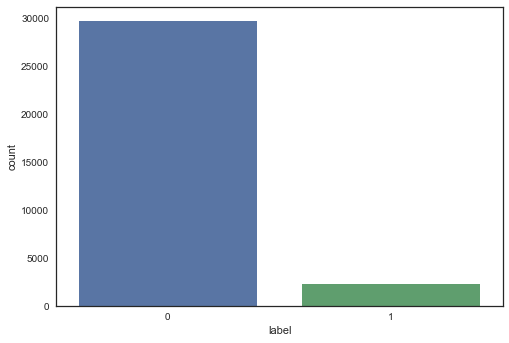

In [8]:
sns.countplot(train['label'])

In the train dataset, we have 2,242 (~7%) tweets labeled as racist or sexist, and 29,720 (~93%) tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge.

<br>
Now we will check the distribution of length of the tweets, in terms of words, in both train and test data.

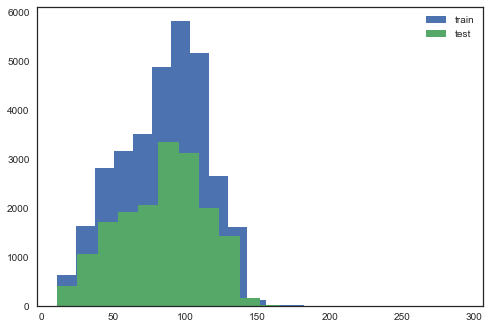

In [9]:
train_length=train['tweet'].str.len()
test_length=test['tweet'].str.len()

plt.hist(train_length,bins=20,label='train')
plt.hist(test_length,bins=20,label='test')
plt.legend();


### Data Cleaning

In [10]:
combi=train.append(test,ignore_index=True)
combi.shape

(49159, 3)

In [11]:
def remove_pattern(input_text,pattern):
    r=re.findall(pattern,input_text)
    for i in r:
        input_text=re.sub(i,'',input_text)
    
    return input_text

__1. Removing Twitter Handles (@user)__

In [12]:
combi['tidy_tweet']=np.vectorize(remove_pattern)(combi['tweet'],'@[\w]*')
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


__2. Removing Punctuations, Numbers, and Special Characters__

In [13]:
combi['tidy_tweet']=combi['tidy_tweet'].str.replace('[^a-zA-Z#]',' ')
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [14]:
#removing stop words

from nltk.corpus import stopwords
from nltk import word_tokenize
stop=set(stopwords.words('english'))

def text_process(msg):
    msg=[word for word in msg if word not in stop]
    return msg

__3. Text Normalization__

Here we will use nltk's PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [15]:
tokenized_tweet=combi['tidy_tweet'].apply(lambda x:x.split())

In [16]:
tokenized_tweet.head()

0                    [when, a, father, is, dysfunctional, and, is, so, selfish, he, drags, his, kids, into, his, dysfunction, #run]
1    [thanks, for, #lyft, credit, i, can, t, use, cause, they, don, t, offer, wheelchair, vans, in, pdx, #disapointed, #getthanked]
2                                                                                                           [bihday, your, majesty]
3                                                                       [#model, i, love, u, take, with, u, all, the, time, in, ur]
4                                                                                           [factsguide, society, now, #motivation]
Name: tidy_tweet, dtype: object

Now we can normalize the tokenized tweets.

In [17]:
tokenized_tweet=tokenized_tweet.apply(text_process)
tokenized_tweet.head(1)

0    [father, dysfunctional, selfish, drags, kids, dysfunction, #run]
Name: tidy_tweet, dtype: object

In [18]:
from nltk.stem.porter import *
stemmer=PorterStemmer()



tokenized_tweet=tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])

In [19]:
tokenized_tweet.head()

0                                   [father, dysfunct, selfish, drag, kid, dysfunct, #run]
1    [thank, #lyft, credit, use, caus, offer, wheelchair, van, pdx, #disapoint, #getthank]
2                                                                        [bihday, majesti]
3                                                     [#model, love, u, take, u, time, ur]
4                                                             [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

Now let’s stitch these tokens back together.

In [20]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=' '.join(tokenized_tweet[i])

    
combi['tidy_tweet']=tokenized_tweet

In [21]:
combi['tidy_tweet'].head()

0                               father dysfunct selfish drag kid dysfunct #run
1    thank #lyft credit use caus offer wheelchair van pdx #disapoint #getthank
2                                                               bihday majesti
3                                                 #model love u take u time ur
4                                                     factsguid societi #motiv
Name: tidy_tweet, dtype: object

## Story Generation and Visualization from Tweets

#### A) Understanding the common words used in the tweets: WordCloud

Now I want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

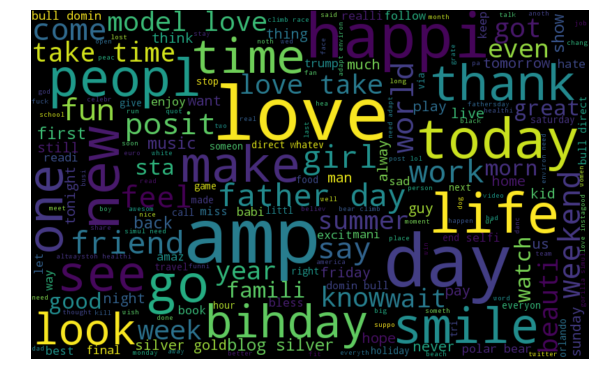

In [22]:
all_words=''.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wc=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off');


We can see most of the words are positive or neutral. Words like love, great, friend, life are the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes (racist/sexist or not) in our train data.

__B) Words in non racist/sexist tweets__

In [23]:
normal_words=''.join([text for text in combi['tidy_tweet'][combi['label']==0]])

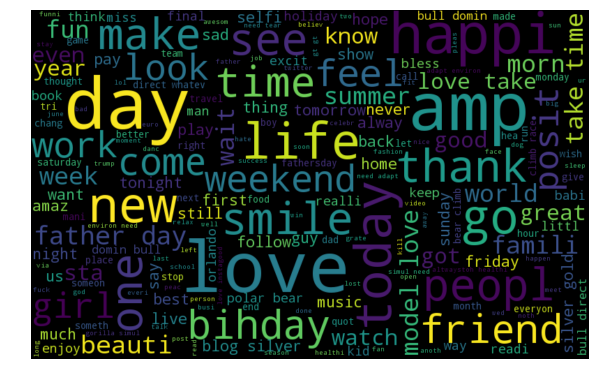

In [24]:
wc=WordCloud(width=800,height=500,random_state=21,max_font_size=101).generate(normal_words)

plt.figure(figsize=(10,7))
plt.imshow(wc,interpolation='bilinear'),
plt.axis('off');


Most of the frequent words are compatible with the sentiment, i.e, non-racist/sexists tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative, racist, and sexist terms.

__C) Racist/Sexist Tweets__

In [25]:
negative_words=''.join([word for word in combi['tidy_tweet'][combi['label']==1]])

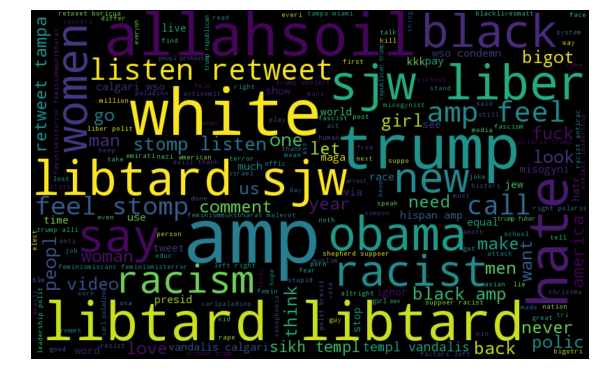

In [26]:
wc=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)

plt.figure(figsize=(10,7))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off');

As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on. Next we will the hashtags/trends in our twitter data.

__D) Understanding the impact of Hashtags on tweets sentiment__

In [22]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r'#(\w+)',i)
        hashtags.append(ht)
        
    return hashtags

In [23]:
# extracting hashtags from non racist/sexist tweets

ht_regular=hashtag_extract(combi['tidy_tweet'][combi['label']==0])
ht_negative=hashtag_extract(combi['tidy_tweet'][combi['label']==1])

# unnesting list
ht_regular=sum(ht_regular,[])
ht_negative=sum(ht_negative,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top 'n' hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

__Non-Racist/Sexist Tweets__

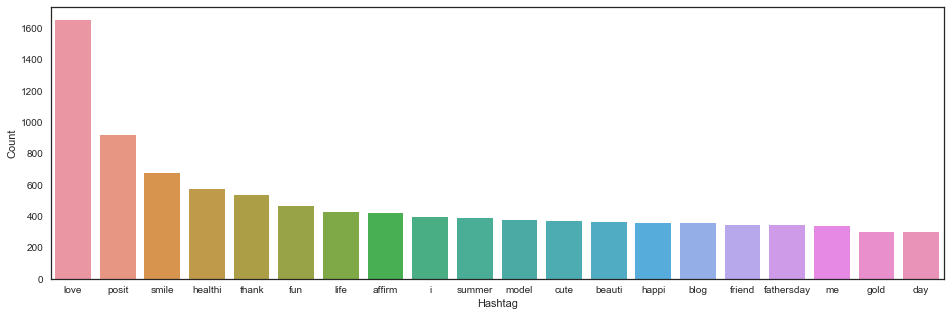

In [26]:
a=nltk.FreqDist(ht_regular)
df=pd.DataFrame({'Hashtag':list(a.keys()),
              'Count':list(a.values())})
df=df[['Hashtag','Count']]

# selecting top 20 most frequent hashtags   
df=df.nlargest(columns='Count',n=20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=df,x='Hashtag',y='Count')
ax.set(ylabel='Count')
plt.show()

All these hashtags are positive and it makes sense. I am expecting negative terms in the plot of the second list. Let’s check the most frequent hashtags appearing in the racist/sexist tweets.

__Racist/Sexist Tweets__

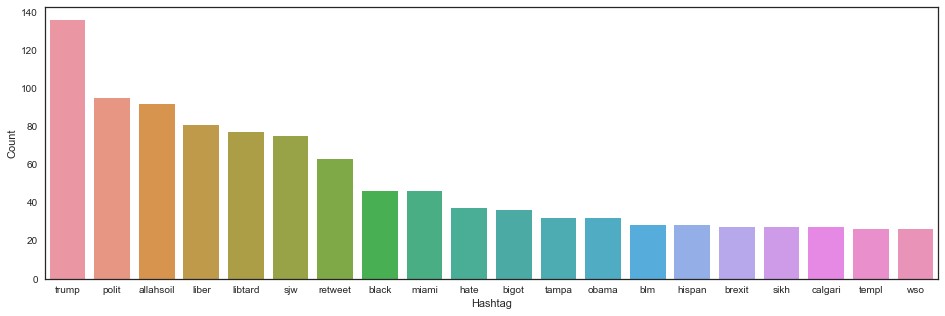

In [30]:
b=nltk.FreqDist(ht_negative)
df2=pd.DataFrame({'Hashtag':list(b.keys()),'Count':list(b.values())})

#selecting top most 20 hashtags
df2=df2.nlargest(n=20,columns='Count',)
plt.figure(figsize=(16,5))
ax=sns.barplot(x='Hashtag',y='Count',data=df2)
ax.set_ylabel('Count');

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

## Extracting Features from Cleaned Tweets

In [24]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import gensim

### Bag-of-Words Features

In [25]:
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

In [26]:
print(bow[:5])

  (0, 737)	1
  (0, 458)	1
  (0, 292)	1
  (1, 595)	1
  (1, 133)	1
  (1, 925)	1
  (1, 874)	1
  (2, 82)	1
  (3, 922)	1
  (3, 882)	1
  (3, 512)	1
  (3, 553)	1
  (4, 562)	1


### TF-IDF Features

In [27]:
tfidf_vecotrizer=TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
tfidf=tfidf_vecotrizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [28]:
print(tfidf[:5])

  (0, 292)	0.488524677668
  (0, 458)	0.594023178795
  (0, 737)	0.639124481118
  (1, 874)	0.351619618059
  (1, 925)	0.450458534821
  (1, 133)	0.548680162163
  (1, 595)	0.610246533994
  (2, 82)	1.0
  (3, 553)	0.579267776079
  (3, 512)	0.362160017855
  (3, 882)	0.458534109028
  (3, 922)	0.568362064111
  (4, 562)	1.0


### Word Embeddings

#### 1. Word2Vec Embeddings

In [29]:
tokenized_text=combi['tidy_tweet'].apply(lambda x:x.split())
model_w2v = gensim.models.Word2Vec(
    tokenized_text,
    size=200, #decide number of features/independent variables
    window=5, #context window size
    min_count=2,
    sg=1, #1 for skip gram model,
    hs=0,
    negative=10, #for negative sampling
    workers=2, #number of cores
    seed=34)
    
model_w2v.train(tokenized_text,total_examples=len(combi['tidy_tweet']),epochs=20)

(6757051, 7659820)

Let's play a bit with our Word2Vec model and see how does it perform. We will specify a word and the model will pull out the most similar words from the corpus.

In [30]:
model_w2v.wv.most_similar(positive='dinner')

[('crockpot', 0.5768659114837646),
 ('burrito', 0.5723538398742676),
 ('#foodcoma', 0.5569257736206055),
 ('#burrito', 0.5465496778488159),
 ('spaghetti', 0.5437140464782715),
 ('#biall', 0.5414159297943115),
 ('lukey', 0.5363285541534424),
 ('#tacotuesday', 0.5207686424255371),
 ('cookout', 0.516974925994873),
 ('ameritrad', 0.5152930021286011)]

In [31]:
model_w2v.wv.most_similar(positive='trump')

[('donald', 0.566518247127533),
 ('phoni', 0.527827262878418),
 ('#republican', 0.5236806869506836),
 ('teleprompt', 0.5231099128723145),
 ('yuge', 0.5226362347602844),
 ('tomlin', 0.5214400291442871),
 ('bigli', 0.5193017721176147),
 ('businessman', 0.5169966816902161),
 ('#deplor', 0.5151267051696777),
 ('#donthecon', 0.5150333046913147)]

In [32]:
model_w2v['food']

array([-0.04368659,  0.65167898,  0.14437091,  0.32788688, -0.26348278,
        0.28777412,  0.08788571,  0.10582048, -0.17137843,  0.20707597,
        0.46365133, -0.18770175, -0.47495416,  0.2319461 , -0.41598457,
       -0.26444724,  0.83976018, -0.35019219,  0.68233532,  0.1250122 ,
        1.09839547,  0.26462433, -0.93349206, -0.0802123 ,  0.02994566,
       -0.1529613 , -0.69515687, -0.9357149 , -0.1386236 ,  0.21356873,
        0.1737092 ,  0.00547252, -0.78078938,  0.15885079,  0.48317301,
       -0.18183517, -0.32881111,  0.51889259, -0.16417728,  0.66804981,
        0.34881407, -0.49875829, -0.16321981, -0.1982519 ,  0.23745561,
       -0.44433519,  0.03445532, -0.96685678, -0.03166667, -0.34888336,
       -0.15232308,  0.10112353, -0.1839463 , -0.89620447,  0.19650722,
        0.12676351,  0.13357808,  0.08502945,  0.30121124, -0.90169942,
        0.17670889,  0.57089996, -0.28548259,  0.26903987, -0.74496096,
        0.63391781,  0.4686529 ,  0.436492  , -0.16878816, -0.18

In [33]:
def word_vector(tokens,size):
    vec=np.zeros(size).reshape((1,size))
    count=0.
    for word in tokens:
        try:
            vec+=model_w2v[word].reshape((1,size))
            count += 1
        except KeyError:
            
            
            continue
    if count!=0:
        vec /= count
    return vec
    

In [34]:
wordvec_arrays=np.zeros((len(tokenized_text),200))

for i in range(len(tokenized_text)):
    wordvec_arrays[i,:]=word_vector(tokenized_text[i],200)
    
wordvec_df=pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(49159, 200)

Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features. 

## Model Building

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

1. Logistic Regression
2. Support Vector Machine
3. RandomForest
4. XGBoost

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score




### 1. Logistic Regression

#### Bag-of-Words Features

In [36]:
train_bow=bow[:31962,:]
test_bow=bow[31962:,:]

Xtrain_bow,Xvalid_bow,y_train,y_valid=train_test_split(train_bow,train['label'],random_state=42,test_size=0.3)

In [37]:
lreg=LogisticRegression()
lreg.fit(Xtrain_bow,y_train)

prediction=lreg.predict_proba(Xvalid_bow)
prediction_int=prediction[:,1]>=0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int=prediction_int.astype(np.int)

f1_score(y_valid,prediction_int)

0.56553998351195378

#### TF-IDF Features

In [38]:
train_tfidf=tfidf[:31962,:]
test_tfidf=tfidf[31962:,:]

Xtrain_tfidf=train_tfidf[y_train.index]
Xvalid_tfidf=train_tfidf[y_valid.index]

In [39]:
lreg.fit(Xtrain_tfidf,y_train)
prediction=lreg.predict_proba(Xvalid_tfidf)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)

f1_score(y_valid,prediction_int)

0.54735013032145952

#### Word2Vec Features

In [40]:
train_w2v=wordvec_df.iloc[:31962,:]
test_w2v=wordvec_df.iloc[31962:,:]

Xtrain_w2v=train_w2v.iloc[y_train.index,:]
Xvalid_w2v=train_w2v.iloc[y_valid.index,:]

In [41]:
lreg.fit(Xtrain_w2v,y_train)

prediction=lreg.predict_proba(Xvalid_w2v)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
f1_score(y_valid,prediction_int)

0.61583577712609971

#### Bag-of-Words Features

In [45]:
def fit_predict(alg,X_train,y_train,X_valid,y_valid):
    alg.fit(X_train,y_train)
    prediction=alg.predict_proba(X_valid)
    prediction_int=prediction[:,1]>=0.3
    prediction_int=prediction_int.astype(np.int)
    f_score=f1_score(y_valid,prediction_int)
    return f_score
    

In [50]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('svc',SVC(kernel='linear',C=1,probability=True)))
models.append(('RF',RandomForestClassifier(n_estimators=400,random_state=11)))
models.append(('xgb',XGBClassifier(max_depth=6,n_estimators=1000)))

In [53]:
results=[]
names=[]

for name,model in models:
    scores=fit_predict(model,Xtrain_bow,y_train,Xvalid_bow,y_valid)
    results.append(scores)
    names.append(name)
#for name,result in zip(names,results):
result_df=pd.DataFrame({'model':names,'score':results})
print(result_df)
  
   

  model     score
0    LR  0.559543
1   svc  0.525378
2    RF  0.498313
3   xgb  0.578472


### TF-IDF Features

In [54]:
results=[]
names=[]

for name,model in models:
    scores=fit_predict(model,Xtrain_tfidf,y_train,Xvalid_tfidf,y_valid)
    results.append(scores)
    names.append(name)
result_df=pd.DataFrame({'model':names,'score':results})
print(result_df)

  model     score
0    LR  0.546862
1   svc  0.533808
2    RF  0.572741
3   xgb  0.566400


### Word2Vec Features

In [58]:
results=[]
names=[]

for name,model in models:
    scores=fit_predict(model,Xtrain_w2v,y_train,Xvalid_w2v,y_valid)
    results.append(scores)
    names.append(name)
result_df=pd.DataFrame({'model':names,'score':results})
print(result_df)

  model     score
0    LR  0.620950
1   svc  0.617555
2    RF  0.612383
3   xgb  0.673557


## Model Finetuning

In [48]:
import xgboost as xgb

Here we will use DMatrices. A DMatrix can contain both the features and the target.

In [49]:
dtrain=xgb.DMatrix(Xtrain_w2v,label=y_train)
dvalid=xgb.DMatrix(Xvalid_w2v,label=y_valid)
dtest=xgb.DMatrix(test_w2v)

In [69]:
# Parameters that we are going to tune
params={
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight':1,
    'eta':1,
    'subsample':1,
    'colsample_bytree':1
}

We will prepare a custom evaluation metric to calculate F1 score.

In [44]:
def custom_eval(preds,dtrain):
    labels=dtrain.get_label().astype(np.int)
    preds=(preds >= 0.3).astype(np.int)
    return [('f1_score',f1_score(labels,preds))]
    

**General Approach for Parameter Tuning**

We will follow the steps below to tune the parameters.

1. Choose a relatively high learning rate. Usually a learning rate of 0.3 is used at this stage.
2. Tune tree-specific parameters such as max_depth, min_child_weight, subsample, colsample_bytree keeping the learning rate fixed.
3. Tune the learning rate.
4. Finally tune gamma to avoid overfitting.

In [50]:
gsearch_params={'max_depth':range(5,10),'min_child_weight':range(3,8)}

In [51]:
gsearch_params=[(max_depth,min_child_weight) for max_depth in range(5,10) for min_child_weight in range(3,8)]

In [53]:
max_f1=0
best_params=None

for max_depth,min_child_weight in gsearch_params:
    print('CV with max_depth :{},min_child_weight :{}'.format(max_depth,min_child_weight))
    
    params['max_depth']=max_depth
    params['min_child_weight']=min_child_weight
    
    #cross validation
    cv_results=xgb.cv(params,
                     dtrain,
                     feval=custom_eval,
                     num_boost_round=200,
                     maximize=True,
                     seed=16,
                     nfold=5,
                     early_stopping_rounds=10)
    
    #finding_best_f1 score:
    mean_f1=cv_results['test-f1_score-mean'].max()
    boost_rounds=cv_results['test-f1_score-mean'].argmax()
    
    print('\tf1 score {} for {} rounds '.format(mean_f1,boost_rounds))
    if mean_f1>max_f1:
        max_f1=mean_f1
        best_params=(max_depth,min_child_weight)
        
print('best params {},{},f1 score{}'.format(best_params[0],best_params[1],mean_f1))

CV with max_depth :5,min_child_weight :3
	f1 score 0.6628554 for 84 rounds 
CV with max_depth :5,min_child_weight :4
	f1 score 0.6530604 for 45 rounds 
CV with max_depth :5,min_child_weight :5
	f1 score 0.6435588000000001 for 59 rounds 
CV with max_depth :5,min_child_weight :6
	f1 score 0.6469001999999999 for 77 rounds 
CV with max_depth :5,min_child_weight :7
	f1 score 0.6478126000000001 for 90 rounds 
CV with max_depth :6,min_child_weight :3
	f1 score 0.6528026 for 54 rounds 
CV with max_depth :6,min_child_weight :4
	f1 score 0.6577818 for 74 rounds 
CV with max_depth :6,min_child_weight :5
	f1 score 0.6488432000000001 for 66 rounds 
CV with max_depth :6,min_child_weight :6
	f1 score 0.6553748 for 71 rounds 
CV with max_depth :6,min_child_weight :7
	f1 score 0.6362947999999999 for 36 rounds 
CV with max_depth :7,min_child_weight :3
	f1 score 0.6467096 for 42 rounds 
CV with max_depth :7,min_child_weight :4
	f1 score 0.647968 for 98 rounds 
CV with max_depth :7,min_child_weight :5
	f1

Updating **max_depth and min_child_weight parameters**

In [70]:
params['max_depth']=7
params['min_child_weight']=5

Tuning subsample and colsample.

In [55]:
gsearch_params=[(subsample,colsample) for subsample in [i/10. for i in range(5,10)] for colsample in [i/10. for i in range(5,10)]]

In [56]:
max_f1=0
best_params=None

for subsample, colsample in gsearch_params:
    print('CV with subsample :{},colsample :{}'.format(subsample,colsample))
    
    #update params
    params['subsample']=subsample
    params['colsample']=colsample
    
    
    cv_results=xgb.cv(params,dtrain,feval=custom_eval,num_boost_round=200,maximize=True,seed=16,nfold=5,early_stopping_rounds=10)
    
    
    #finding best f1 score:
    mean_f1=cv_results['test-f1_score-mean'].max()
    boost_rounds=cv_results['test-f1_score-mean'].argmax()
    
    print('\t F1 score {} for {} rounds'.format(mean_f1,boost_rounds))
    
    if mean_f1>max_f1:
        max_f1=mean_f1
        best_params=(subsample,colsample)
        
        
        
print('Best params {},{} for F1_score{}'.format(best_params[0],best_params[1],max_f1))



CV with subsample :0.5,colsample :0.5
	 F1 score 0.5540284000000001 for 24 rounds
CV with subsample :0.5,colsample :0.6
	 F1 score 0.5540284000000001 for 24 rounds
CV with subsample :0.5,colsample :0.7
	 F1 score 0.5540284000000001 for 24 rounds
CV with subsample :0.5,colsample :0.8
	 F1 score 0.5540284000000001 for 24 rounds
CV with subsample :0.5,colsample :0.9
	 F1 score 0.5540284000000001 for 24 rounds
CV with subsample :0.6,colsample :0.5
	 F1 score 0.6099686 for 96 rounds
CV with subsample :0.6,colsample :0.6
	 F1 score 0.6099686 for 96 rounds
CV with subsample :0.6,colsample :0.7
	 F1 score 0.6099686 for 96 rounds
CV with subsample :0.6,colsample :0.8
	 F1 score 0.6099686 for 96 rounds
CV with subsample :0.6,colsample :0.9
	 F1 score 0.6099686 for 96 rounds
CV with subsample :0.7,colsample :0.5
	 F1 score 0.6146486 for 34 rounds
CV with subsample :0.7,colsample :0.6
	 F1 score 0.6146486 for 34 rounds
CV with subsample :0.7,colsample :0.7
	 F1 score 0.6146486 for 34 rounds
CV wit

Updating __subsample__ and __colsample_bytree__.

In [71]:
params['subsample']=0.9
params['colsample_bytree']=0.5

Now let's tune the learning rate.

In [53]:
max_f1=0
best_params=None

for eta in [0.3,0.2,.1,0.05,0.01,0.005]:
    print('CV with eta :{}'.format(eta))
    
    #updating eta
    params['eta']=eta
    
    
    #run cv
    cv_results=xgb.cv(params,dtrain,feval=custom_eval,num_boost_round=1000,maximize=True,seed=16,nfold=5,early_stopping_rounds=20)
    
    #finding best f1 score:
    mean_f1=cv_results['test-f1_score-mean'].max()
    boost_rounds=cv_results['test-f1_score-mean'].argmax()
    
    print('\t F1 score {} for {} rounds'.format(mean_f1,boost_rounds))
    
    if mean_f1>max_f1:
        max_f1=mean_f1
        best_params=eta
        
print('Best params :{} , f1_score :{}'.format(best_params,max_f1))


CV with eta :0.3
	 F1 score 0.6869598 for 161 rounds
CV with eta :0.2
	 F1 score 0.6874218 for 67 rounds
CV with eta :0.1
	 F1 score 0.6911615999999999 for 105 rounds
CV with eta :0.05
	 F1 score 0.6905488 for 222 rounds
CV with eta :0.01
	 F1 score 0.1301404 for 0 rounds
CV with eta :0.005
	 F1 score 0.1301404 for 0 rounds
Best params :0.1 , f1_score :0.6911615999999999


In [72]:
params['eta']=0.1

lets tune __gamma__ value using the parameters already tuned above. We’ll check for 5 values here.

In [56]:
max_f1=0
best_params=None

for gamma in range(0,15):
    print('CV with gamma {}'.format(gamma/10.))
    
    #update gamma
    params['gamma']=gamma/10.
    
    
    #run cv
    cv_results=xgb.cv(params,
                     dtrain,
                     feval=custom_eval,
                     num_boost_round=200,
                     maximize=True,
                     seed=16,
                     nfold=5,
                     early_stopping_rounds=10)
    
    
    #finding best f1 score:
    mean_f1=cv_results['test-f1_score-mean'].max()
    boost_rounds=cv_results['test-f1_score-mean'].argmax()

    print('f1_score {} for {} rounds'.format(mean_f1,boost_rounds))
    
    if mean_f1>max_f1:
        max_f1=mean_f1
        best_params=gamma/10
        
print('Best params {}, F1_score{}'.format(best_params,max_f1))  

CV with gamma 0.0
f1_score 0.6861504 for 85 rounds
CV with gamma 0.1
f1_score 0.6877178 for 116 rounds
CV with gamma 0.2
f1_score 0.6861602 for 104 rounds
CV with gamma 0.3
f1_score 0.6904805999999999 for 122 rounds
CV with gamma 0.4
f1_score 0.6845057999999999 for 119 rounds
CV with gamma 0.5
f1_score 0.6851665999999998 for 96 rounds
CV with gamma 0.6
f1_score 0.684855 for 108 rounds
CV with gamma 0.7
f1_score 0.6824275999999999 for 69 rounds
CV with gamma 0.8
f1_score 0.6857462 for 85 rounds
CV with gamma 0.9
f1_score 0.6945281999999999 for 106 rounds
CV with gamma 1.0
f1_score 0.6866798000000001 for 99 rounds
CV with gamma 1.1
f1_score 0.6889541999999999 for 110 rounds
CV with gamma 1.2
f1_score 0.6941678 for 123 rounds
CV with gamma 1.3
f1_score 0.6906490000000001 for 97 rounds
CV with gamma 1.4
f1_score 0.6835628 for 90 rounds
Best params 0.9, F1_score0.6945281999999999


In [73]:
params['gamma']=0.9

Let's have a look at the final list of parameters.

In [75]:
params

{'colsample_bytree': 0.5,
 'eta': 0.1,
 'gamma': 0.9,
 'max_depth': 7,
 'min_child_weight': 5,
 'objective': 'binary:logistic',
 'subsample': 0.9}

In [77]:
xgb_model=xgb.train(params,dtrain,feval=custom_eval,num_boost_round=1000,maximize=True,early_stopping_rounds=10,
                   evals=[(dvalid,'validation')])

[0]	validation-f1_score:0.133165
Will train until validation-f1_score hasn't improved in 10 rounds.
[1]	validation-f1_score:0.133165
[2]	validation-f1_score:0.133165
[3]	validation-f1_score:0.133165
[4]	validation-f1_score:0.133165
[5]	validation-f1_score:0.378199
[6]	validation-f1_score:0.470965
[7]	validation-f1_score:0.522542
[8]	validation-f1_score:0.561514
[9]	validation-f1_score:0.56872
[10]	validation-f1_score:0.583746
[11]	validation-f1_score:0.577517
[12]	validation-f1_score:0.587087
[13]	validation-f1_score:0.588872
[14]	validation-f1_score:0.592651
[15]	validation-f1_score:0.59434
[16]	validation-f1_score:0.592949
[17]	validation-f1_score:0.595028
[18]	validation-f1_score:0.600969
[19]	validation-f1_score:0.605668
[20]	validation-f1_score:0.604049
[21]	validation-f1_score:0.605519
[22]	validation-f1_score:0.601784
[23]	validation-f1_score:0.611611
[24]	validation-f1_score:0.606705
[25]	validation-f1_score:0.60507
[26]	validation-f1_score:0.609756
[27]	validation-f1_score:0.6

In [79]:
test_pred=xgb_model.predict(dtest)
test['label']=(test_pred>=0.3).astype(np.int)

In [80]:
test.head()

,id,tweet,label
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,0
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,0
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,0
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite",0
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦",0
5,31968,choose to be :) #momtips,0
6,31969,something inside me dies ð¦ð¿â¨ eyes ness #smokeyeyes #tired #lonely #sof #grungeâ¦,0
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸â¤ï¸â¤ï¸â¤ï¸ #thanks#aleeee !!!,0
8,31971,@user @user @user i will never understand why my dad left me when i was so young.... :/ #deep #inthefeels,0
9,31972,#delicious #food #lovelife #capetown mannaepicure #resturantâ¦,0
